<a href="https://colab.research.google.com/github/jensontmathew/TATA-Motors-Stock-Price-Prediction/blob/main/Tata_Motors_stock_price_prediction_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Domain** : Stock Market

**Objective** : To predict the stock price of TataMotors for the next four months.

**Data** : The data is taken from yahoofinance and the data spans 4 year

**Data Dictionary** :

Date -  The particular day of month

Open - The price of the stock when the market opens

Close - This is the final price at which a stock is traded on a particular trading day.

Adj Close - The "Adjusted Close" price in stock market data reflects the final price of a stock at the end of a trading day, adjusted to account for corporate actions such as dividends, stock splits, or other structural changes impacting the stock's value

Volume -
"Volume" in the stock market refers to how many shares of a company's stock were bought and sold during a specific time, like a day



In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import plotly.graph_objects as pl

In [2]:
# Get the stock data
data = yf.download("TATAMOTORS.NS", period="4y")

[*********************100%%**********************]  1 of 1 completed


In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-12,163.449997,174.899994,162.500000,173.350006,172.811401,66138915
2019-12-13,177.250000,183.949997,175.500000,176.699997,176.150986,93019636
2019-12-16,177.000000,178.800003,173.350006,174.949997,174.406418,26249975
2019-12-17,176.000000,181.149994,175.350006,180.199997,179.640106,38213263
2019-12-18,182.100006,184.500000,170.449997,174.800003,174.256897,63861334


In [5]:
#saving the file
tata_data=df.to_csv('tatastock.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 993 entries, 2019-12-12 to 2023-12-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       993 non-null    float64
 1   High       993 non-null    float64
 2   Low        993 non-null    float64
 3   Close      993 non-null    float64
 4   Adj Close  993 non-null    float64
 5   Volume     993 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.3 KB


In [7]:
df.drop(['Open','High','Low','Adj Close','Volume'],axis=1,inplace=True)

In [8]:
df.reset_index(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    993 non-null    datetime64[ns]
 1   Close   993 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.6 KB


In [10]:
df['Date']=pd.to_datetime(df['Date'])

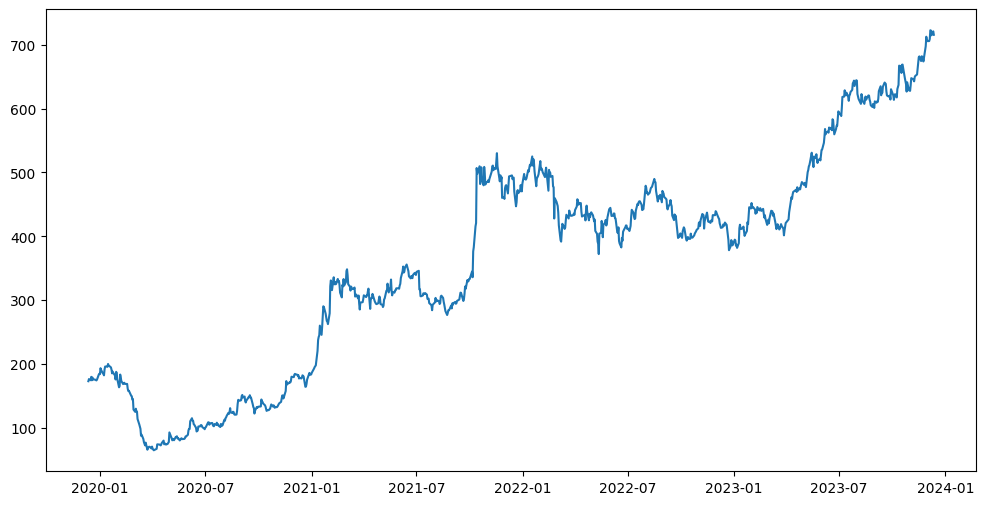

In [11]:
# plotting
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Close'])

In [12]:
trace=pl.Scatter(
    x=df['Date'],
    y=df['Close'],
    mode='lines',
    name='Date'
)

layout=pl.Layout(
    title='Tata Motors Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}

)

fig=pl.Figure(data=[trace],layout=layout)
fig.show()

In [13]:
close_data=df['Close'].values

In [14]:
close_data

array([173.3500061 , 176.69999695, 174.94999695, 180.19999695,
       174.80000305, 179.1499939 , 175.94999695, 176.05000305,
       175.5       , 174.6000061 , 176.1499939 , 183.69999695,
       185.1499939 , 184.44999695, 193.75      , 191.1000061 ,
       185.6499939 , 184.69999695, 182.55000305, 192.        ,
       196.3500061 , 196.25      , 195.8500061 , 200.3500061 ,
       197.55000305, 197.30000305, 195.        , 191.3999939 ,
       185.6000061 , 188.3999939 , 186.5       , 182.19999695,
       176.1000061 , 188.05000305, 186.19999695, 176.6000061 ,
       163.8500061 , 165.69999695, 183.75      , 178.8500061 ,
       173.6000061 , 168.8999939 , 169.75      , 170.94999695,
       169.5       , 169.1000061 , 169.1000061 , 161.6000061 ,
       158.05000305, 158.5       , 150.6499939 , 149.8999939 ,
       144.55000305, 145.25      , 128.94999695, 125.40000153,
       130.3500061 , 126.19999695, 125.75      , 114.19999695,
       105.69999695,  98.90000153,  88.        ,  89.75

In [15]:
#reshaping
close_data=close_data.reshape(-1,1)

In [16]:
close_data

array([[173.3500061 ],
       [176.69999695],
       [174.94999695],
       [180.19999695],
       [174.80000305],
       [179.1499939 ],
       [175.94999695],
       [176.05000305],
       [175.5       ],
       [174.6000061 ],
       [176.1499939 ],
       [183.69999695],
       [185.1499939 ],
       [184.44999695],
       [193.75      ],
       [191.1000061 ],
       [185.6499939 ],
       [184.69999695],
       [182.55000305],
       [192.        ],
       [196.3500061 ],
       [196.25      ],
       [195.8500061 ],
       [200.3500061 ],
       [197.55000305],
       [197.30000305],
       [195.        ],
       [191.3999939 ],
       [185.6000061 ],
       [188.3999939 ],
       [186.5       ],
       [182.19999695],
       [176.1000061 ],
       [188.05000305],
       [186.19999695],
       [176.6000061 ],
       [163.8500061 ],
       [165.69999695],
       [183.75      ],
       [178.8500061 ],
       [173.6000061 ],
       [168.8999939 ],
       [169.75      ],
       [170

In [17]:
split_percentile=0.80
split=int(split_percentile*len(close_data))

In [18]:
split

794

In [19]:
close_train=close_data[:split]
close_test=close_data[split:]

In [20]:
date_train=df['Date'][:split]
date_test=df['Date'][split:]

In [21]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [22]:
look_back=40
train_generator=TimeseriesGenerator(close_train,close_train,length=look_back,batch_size=20)

In [23]:
print(train_generator)

In [24]:
test_generator=TimeseriesGenerator(close_test,close_test,length=look_back,batch_size=1)

In [25]:
model=Sequential()
model.add(LSTM(200,activation='relu',input_shape=(look_back,1)))
model.add(Dense(1))

In [26]:
model.compile(optimizer='adam',loss='mse')

In [27]:
model.fit(train_generator,epochs=100)

Epoch 1/100
38/38 [==============================] - 7s 98ms/step - loss: 98441.5391
Epoch 2/100
38/38 [==============================] - 2s 62ms/step - loss: 47621.5312
Epoch 3/100
38/38 [==============================] - 2s 64ms/step - loss: 271398.7188
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 551270.3750
Epoch 5/100
38/38 [==============================] - 4s 98ms/step - loss: 48639.8945
Epoch 6/100
38/38 [==============================] - 2s 62ms/step - loss: 68640.1094
Epoch 7/100
38/38 [==============================] - 2s 64ms/step - loss: 282386.9688
Epoch 8/100
38/38 [==============================] - 2s 62ms/step - loss: 123574.3672
Epoch 9/100
38/38 [==============================] - 3s 69ms/step - loss: 3312.4460
Epoch 10/100
38/38 [==============================] - 2s 62ms/step - loss: 2734.6594
Epoch 11/100
38/38 [==============================] - 2s 63ms/step - loss: 2217.7832
Epoch 12/100
38/38 [==============================] - 2s 62ms/

In [28]:
prediction=model.predict(test_generator)

159/159 [==============================] - 2s 10ms/step


In [29]:
#reshapeing again for plotting
close_train=close_train.reshape((-1))
close_test=close_test.reshape((-1))
prediction=prediction.reshape((-1))

In [30]:
trace1=pl.Scatter(
    x=date_train,
    y=close_train,
    mode='lines',
    name='train_data'
)

trace2=pl.Scatter(
    x=date_test,
    y=close_test,
    mode='lines',
    name='test_data'
)

trace3=pl.Scatter(
    x=date_test,
    y=prediction,
    mode='lines',
    name='prediction',
    fillcolor='blue'
)

layout=pl.Layout(
    title='TATA Stock',
    xaxis={'title':'Date'},
    yaxis={'title':'Close'}
)

fig=pl.Figure(data=[trace1,trace2,trace3],layout=layout)
fig.show()

In [31]:
# date_test1=date_test[:233]
# plt.figure(figsize=(15,6))
# plt.plot(date_train,close_train)
# plt.plot(date_test,close_test)
# plt.plot(date_test1,prediction)

In [32]:
#predicting prices for the next 2 months
df.tail(5)

,Date,Close
988,2023-12-06,722.450012
989,2023-12-07,721.950012
990,2023-12-08,714.549988
991,2023-12-11,720.799988
992,2023-12-12,715.400024


In [33]:
#we have data till today(2023-12-08).Now we have to generate date for the next 2 month

In [34]:
look_back

40

In [35]:
import numpy as np
# Generating future timestamps for prediction (2 months = 60 days)
future_timestamps = pd.date_range(df['Date'].iloc[-1], periods=120, freq='D')[1:]  # Start from the next day

# Last 'look_back' days of data from the training set to start predicting future values
last_sequence = close_data[-look_back:]

future_predictions = []

for i in range(len(future_timestamps)):
    prediction = model.predict(last_sequence.reshape(1, look_back, 1))[0, 0]
    future_predictions.append(prediction)
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = prediction

# Creating a DataFrame for future predictions
future_predicted_dates = pd.Series(future_timestamps)
future_predicted_prices = pd.Series(future_predictions)
future_predicted_data = pd.DataFrame({'Date': future_predicted_dates, 'Predicted_Close': future_predicted_prices})


1/1 [==============================] - 0s 29ms/step


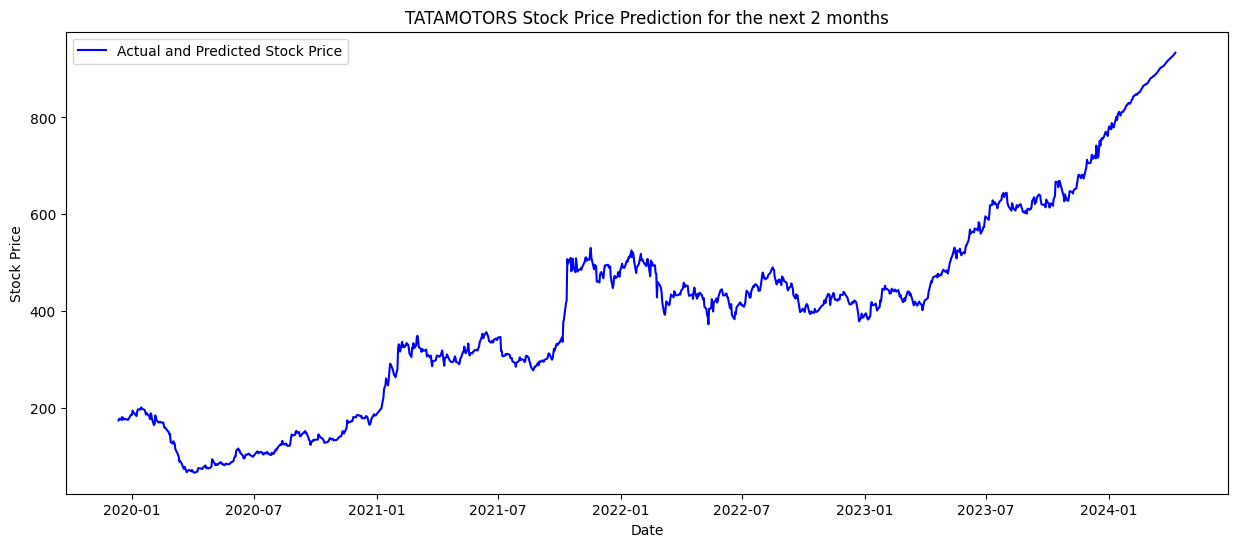

In [36]:
# Concatenating actual and predicted data for plotting
combined_dates = pd.concat([df['Date'], future_predicted_data['Date']])
combined_prices = pd.concat([df['Close'], future_predicted_data['Predicted_Close']])

# Plotting the actual and predicted prices
plt.figure(figsize=(15, 6))
plt.plot(combined_dates, combined_prices, label='Actual and Predicted Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('TATAMOTORS Stock Price Prediction for the next 2 months')
plt.legend()
plt.show()


In [37]:
import plotly.graph_objs as go

# Extracting dates for train, test, and predicted data
train_dates = df['Date'][:split]
test_dates = df['Date'][split:]
predicted_dates = future_predicted_data['Date']

# Combining train, test, and predicted prices
combined_dates = pd.concat([train_dates, test_dates, predicted_dates])
combined_prices = pd.concat([df['Close'][:split], df['Close'][split:], future_predicted_data['Predicted_Close']])

# Creating traces for each dataset
trace_train = go.Scatter(x=train_dates, y=df['Close'][:split], mode='lines', name='Train', line=dict(color='blue'))
trace_test = go.Scatter(x=test_dates, y=df['Close'][split:], mode='lines', name='Test', line=dict(color='green'))
trace_predicted = go.Scatter(x=predicted_dates, y=future_predicted_data['Predicted_Close'], mode='lines', name='Predicted', line=dict(color='red'))

# Creating the plot
layout = go.Layout(
    title='TATAMOTORS Stock Price Prediction',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Stock Price')
)

fig = go.Figure(data=[ trace_train,trace_test,trace_predicted], layout=layout)
fig.show()
